# Taylor Series for Approximations

Taylor series are commonly used in physics to approximate functions making them easier to handle specially when solving equations. In this notebook we give a visual example on how it works and the biases that it introduces.

## Theoretical Formula

Consider a function $f$ that is $n$ times differentiable in a point $a$. Then by Taylor's theorem, for any point $x$ in the domain of f, we have the Taylor expansion about the point $a$ is defined as:
\begin{equation}
f(x) = f(a) + \sum_{k=1}^n \frac{f^{k}(a)}{k!}(x-a)^k + o\left((x-a)^n\right) \quad,
\end{equation}
where $f^{(k)}$ is the derivative of order $k$ of $f$. Usually, we consider $a=0$ which gives:
\begin{equation}
f(x) = f(0) + \sum_{k=1}^n \frac{f^{k}(0)}{k!}(x)^k + o\left((x)^n\right) \quad.
\end{equation}

For example, the exponential, $e$ is infinitely differentiable with $e^{(k)}=e$ and $e^0=1$. This gives us the following Taylor expansion:
\begin{equation}
e(x) = 1 + \sum_{k=1}^\infty \frac{x^k}{k!} \quad.
\end{equation}

## Visualising Taylor Expansion Approximation and its Bias

Let us see visually how the Taylor expansion approximatees a given function. We start by defining our function below, for example we will consider the exponential function, $e$ again up to order 3.

In [2]:
#### FOLDED CELL
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from sympy import Symbol, series, lambdify, latex
from sympy.functions import *
from ipywidgets import interactive_output
import ipywidgets as widgets
from sympy.parsing.sympy_parser import parse_expr
import numpy as np

x = Symbol('x')

In [3]:
order = 3
func = exp(x)

In [4]:
#### FOLDED CELL
taylor_exp = series(func,x,n=order+1)
approx = lambdify(x, sum(taylor_exp.args[:-1]), "numpy")
func_np = lambdify(x, func, "numpy")
latex_func = '$'+latex(func)+'$'
latex_taylor = '\\begin{equation} '+latex(taylor_exp)+' \end{equation}'

The Taylor expansion of  {{ latex_func }} is :
{{latex_taylor}}

Now let's plot the function and its expansion while considering a point, noted $p$, to study the biais that we introduce when we approximate the function by its expansion:

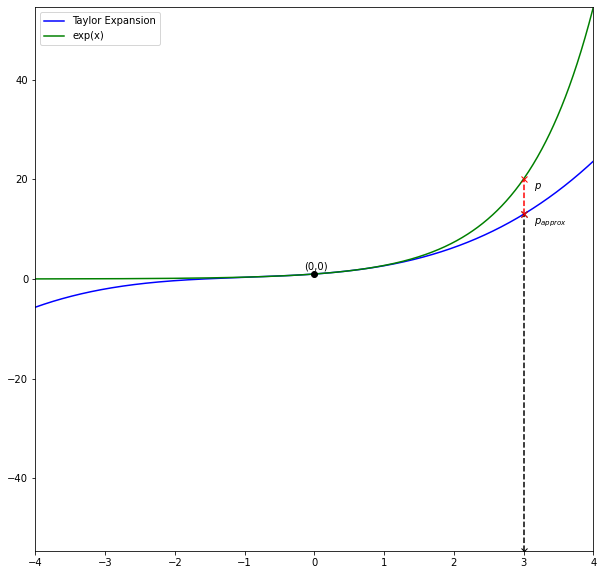

Approximation  order : 3
Approximation  bias  : 7.085536923187668


In [5]:
#### FOLDED CELL
text_offset = np.array([-0.15,2.])

func='exp(x)'
order = 3
x1 = 3
x_min, x_max = -4,4
func_sp = parse_expr(func)
taylor_exp = series(func_sp,x,n=order+1)
approx = lambdify(x, sum(taylor_exp.args[:-1]), "numpy")
func_np = lambdify(x, func_sp, "numpy")
n_points = 1000
x_array = np.linspace(x_min,x_max,n_points)
approx_array = np.array([approx(z) for z in x_array])
func_array = np.array([func_np(z) for z in x_array])
func_x1 = func_np(x1)
approx_x1 = approx(x1)
plt.figure(42,figsize=(10,10))
plt.plot(x_array,approx_array,color='blue',label='Taylor Expansion')
plt.plot(x_array,func_array,color='green',label=func)
plt.plot(0,approx(0),color='black',marker='o')
plt.annotate(r'(0,0)',[0,approx(0)],xytext=text_offset)
plt.plot([x1,x1]
         ,[-np.max(np.abs([np.min(func_array),np.max(func_array)])),min(approx_x1, func_x1)]
         ,'--',color='black',marker='x')
plt.plot([x1,x1],[approx_x1, func_x1],'r--',marker='x')
plt.annotate(r'$p_{approx}$',[x1,approx(x1)],xytext=[x1,approx(x1)]-text_offset)
plt.annotate(r'$p$',[x1,func_np(x1)],xytext=[x1,func_np(x1)]-text_offset)
plt.xlim([x_min,x_max])
plt.ylim(-np.max(np.abs([np.min(func_array),np.max(func_array)]))
         ,np.max(np.abs([np.min(func_array),np.max(func_array)])))
plt.legend()
plt.show()
print('Approximation  order : {}'.format(order))
print('Approximation  bias  : {}'.format(func_x1-approx_x1))

Notice that the further $p$ gets away from the point of the expansion (in that case $0$), the higher the approximation bias gets. Samely, the lower the order of approximation is, the higher the approximation bias gets.